In [71]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob
import os

In [72]:
%matplotlib inline

# 1d case

In [73]:
fs_IS = []
fs_ISCE = []
#files = sorted(glob.glob('1d/data*hdf5'), key=os.path.getmtime)
#for f in files:
for n in range(6):
    fs_IS.append(h5py.File(f'IS/Shocktube1DPara/Shear/data_serial_TIx_{n}.hdf5', 'r'))
#    fs_IS.append(h5py.File(f'IS/Shocktube1DPara/Ideal/big/data_serial_TIx_{n}.hdf5', 'r'))
    fs_ISCE.append(h5py.File(f'ISCE/Shocktube1DPara/Shear/data_serial_TIx_{n}.hdf5', 'r'))

In [74]:
fs_IS, fs_ISCE

([<HDF5 file "data_serial_TIx_0.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_1.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_2.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_3.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_4.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_5.hdf5" (mode r)>],
 [<HDF5 file "data_serial_TIx_0.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_1.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_2.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_3.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_4.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_5.hdf5" (mode r)>])

In [75]:
fs_IS[0]['Primitive/pi11'].shape, fs_ISCE[0]['Primitive/pi11'].shape

((4000,), (4000,))

In [76]:
fs_IS[0]['Domain'].attrs.keys()
fs_ISCE[0]['Domain'].attrs.keys()

<KeysViewHDF5 ['Ng', 'Nx', 'Ny', 'Nz', 'dt', 'dx', 'dy', 'dz', 'endTime', 'nx', 'ny', 'nz', 'xmax', 'xmin', 'ymax', 'ymin', 'zmax', 'zmin']>

In [77]:
fs_IS[0]['Optional'].attrs.keys()
fs_ISCE[0]['Optional'].attrs.keys()

<KeysViewHDF5 ['eta', 'kappa', 'nOptionalSimArgs', 'tau_Pi', 'tau_pi', 'tau_q', 'zeta']>

In [78]:
# eta = fs[0]['Optional'].attrs['eta'][0]
# tau_pi = fs[0]['Optional'].attrs['tau_pi'][0]
# print(f"Dissipation strength {eta}, "
#       f"relaxation time {tau_pi}, "
#       f"timestep {fs[0]['Domain'].attrs['dt'][0]}")

In [79]:
print(fs_IS[-1].attrs['t'])
print(fs_ISCE[-1].attrs['t'])

[0.4]
[0.4]


In [80]:
#fs_ISCE[-1]['Auxiliary/pi11NS'][:]

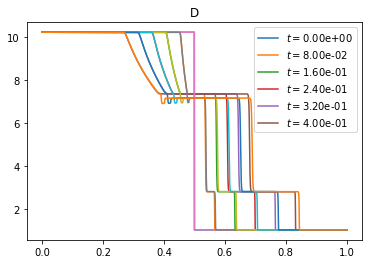

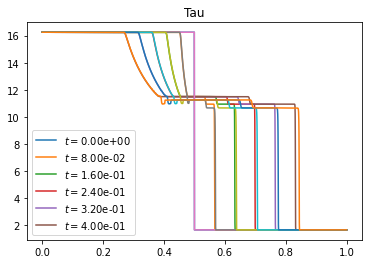

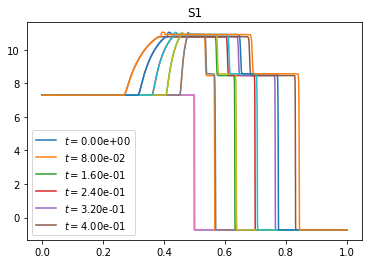

In [81]:
#nslice=fs_IS[0]['Domain'].attrs['ny'][0]//2
for quant in['D','Tau','S1']:
    plt.figure()
    for f in fs_IS:
        #plt.plot(f['Domain/x'], f['Conserved/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
        plt.plot(f['Domain/x'], f['Conserved/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
    for f in fs_ISCE:
        #plt.plot(f['Domain/x'], f['Conserved/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
        plt.plot(f['Domain/x'], f['Conserved/'+quant][:])#,label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant)
    plt.legend()
    plt.savefig("ComparePlots/Cons_"+quant+".pdf")
    plt.show()


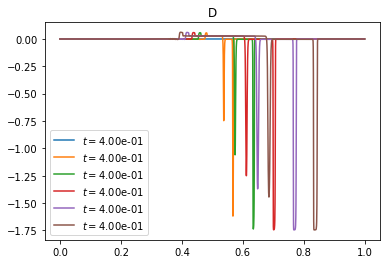

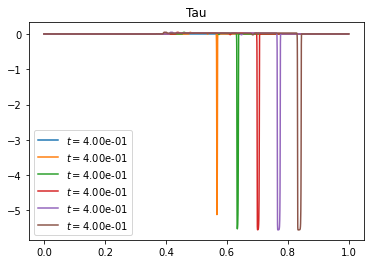

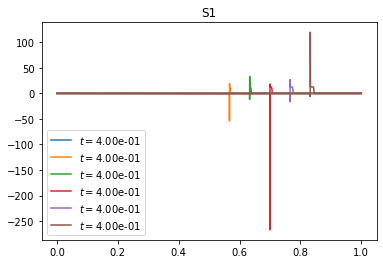

In [82]:
for quant in['D','Tau','S1']:
    plt.figure()
    for n in range(len(fs_IS)):
        #plt.plot(f['Domain/x'], f['Conserved/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
        plt.plot(fs_IS[n]['Domain/x'], (fs_IS[n]['Conserved/'+quant][:] - fs_ISCE[n]['Conserved/'+quant][:])/fs_IS[n]['Conserved/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
        plt.title(quant)
    plt.legend()
    plt.savefig("ComparePlots/ConsRelDiff_"+quant+".pdf")
    plt.show()

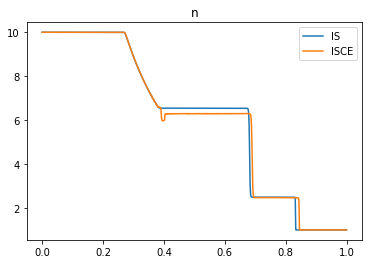

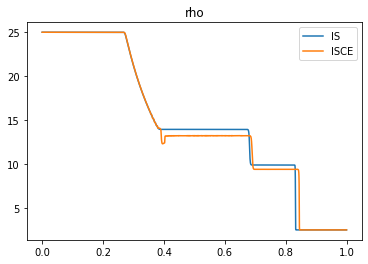

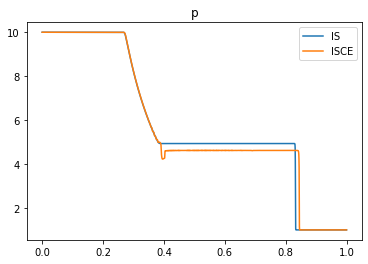

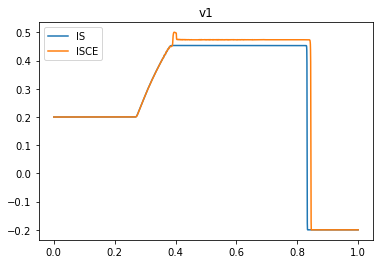

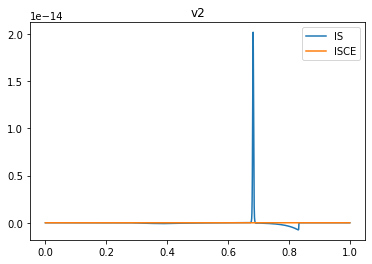

In [83]:
for quant in['n','rho','p','v1','v2']:
    plt.figure()
    #for f in fs:
    fIS = fs_IS[-1]
#    plt.plot(f['Domain/x'], f['Primitive/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
    fISCE = fs_ISCE[-1]
    plt.plot(fIS['Domain/x'], fIS['Primitive/'+quant][:],label='IS')#=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.plot(fISCE['Domain/x'], fISCE['Primitive/'+quant][:],label='ISCE')#=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant)
    plt.legend()
    plt.savefig("ComparePlots/Prims_"+quant+".pdf")


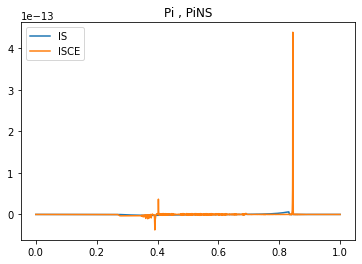

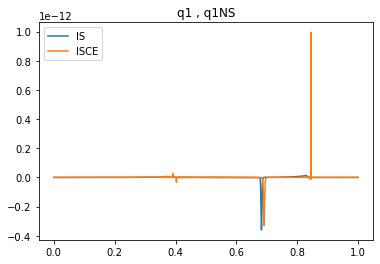

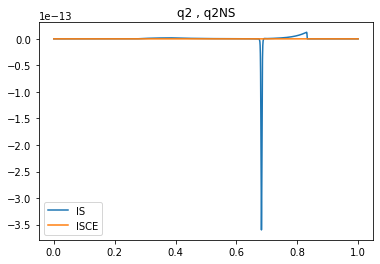

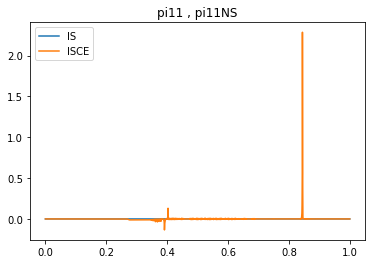

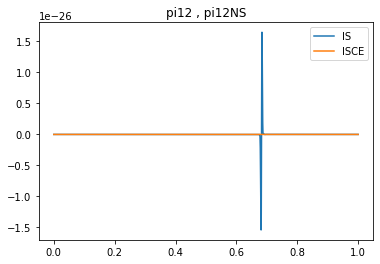

In [84]:
for quant in ['Pi','q1', 'q2', 'pi11', 'pi12']:
    plt.figure()
    #for f in fs:
    fIS = fs_IS[-1]
#    plt.plot(f['Domain/x'], f['Primitive/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
    fISCE = fs_ISCE[-1]
    plt.plot(fIS['Domain/x'], fIS['Primitive/'+quant][:],label='IS')#=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.plot(fISCE['Domain/x'], fISCE['Auxiliary/'+quant+'NS'][:],label='ISCE')#=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant+' , '+quant+'NS')
    plt.legend()
    plt.savefig("ComparePlots/Prims_"+quant+".pdf")

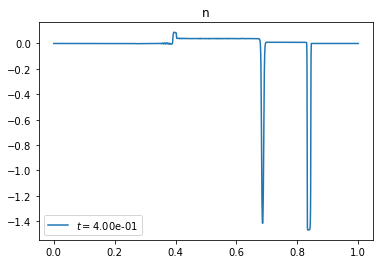

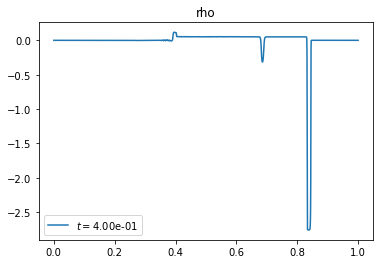

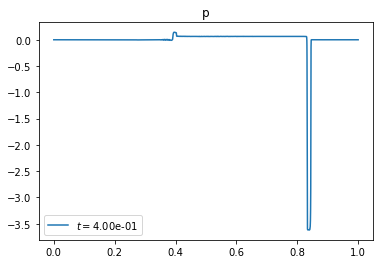

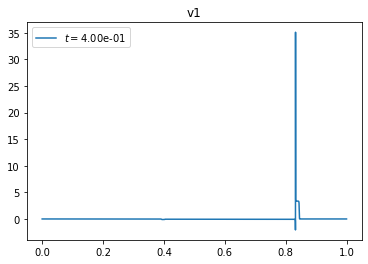

<ipython-input-85-9eb475c46301>:6: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(fIS['Domain/x'], (fIS['Primitive/'+quant][:] - fISCE['Primitive/'+quant][:])/fIS['Primitive/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")


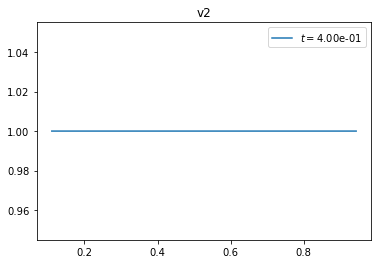

In [85]:
for quant in['n','rho','p','v1','v2']:
    plt.figure()
    #for f in fs:
    fIS = fs_IS[-1]
    fISCE = fs_ISCE[-1]
    plt.plot(fIS['Domain/x'], (fIS['Primitive/'+quant][:] - fISCE['Primitive/'+quant][:])/fIS['Primitive/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant)
    plt.legend()
    plt.savefig("ComparePlots/PrimsRelDiff_"+quant+".pdf")
    plt.show()
    

In [86]:
# for quant in['Pi','q1', 'q2', 'pi11', 'pi12']:
#     plt.figure()
#     #for f in fs:
#     fIS = fs_IS[-1]
#     fISCE = fs_ISCE[-1]
#     plt.plot(fIS['Domain/x'], (fIS['Primitive/'+quant][:] - fISCE['Auxiliary/'+quant+'NS'][:])/fIS['Primitive/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
#     plt.title(quant+' - '+quant+'NS / '+quant)
#     plt.legend()
#     plt.savefig("ComparePlots/PrimsDiff_"+quant+".pdf")
#     plt.show()
    

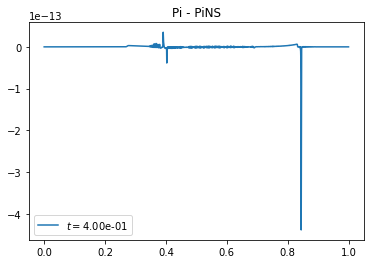

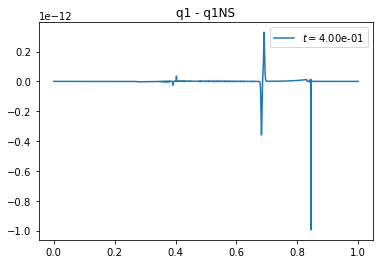

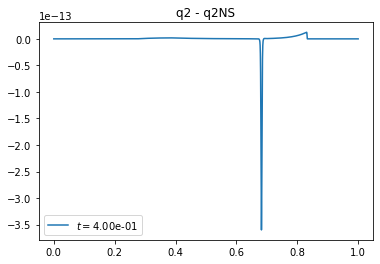

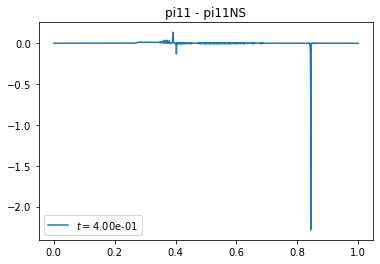

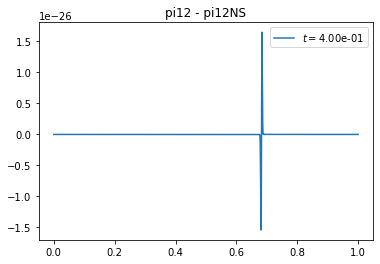

In [87]:
for quant in['Pi','q1', 'q2', 'pi11', 'pi12']:
    plt.figure()
    #for f in fs:
    fIS = fs_IS[-1]
    fISCE = fs_ISCE[-1]
    plt.plot(fIS['Domain/x'], (fIS['Primitive/'+quant][:] - fISCE['Auxiliary/'+quant+'NS'][:]),label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant+' - '+quant+'NS')
    plt.legend()
    plt.savefig("ComparePlots/PrimsAbsDiff_"+quant+".pdf")
    plt.show()
    

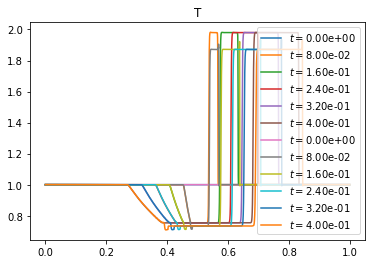

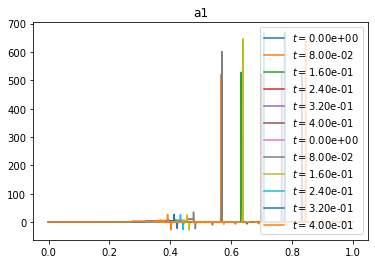

In [88]:
for quant in ['T','a1']:
    plt.figure()
    for f in fs_IS:
        #plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
        plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
    for f in fs_ISCE:
        #plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
        plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant)
    plt.legend()
    plt.savefig("ComparePlots/Aux_"+quant+".pdf")
    plt.show()
